In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Load the Titanic dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#1. Summary statistics
# Data types and non-null counts
df.info()

# Summary statistics for numeric columns
df.describe()

# Summary statistics for all columns
df.describe(include='all')

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

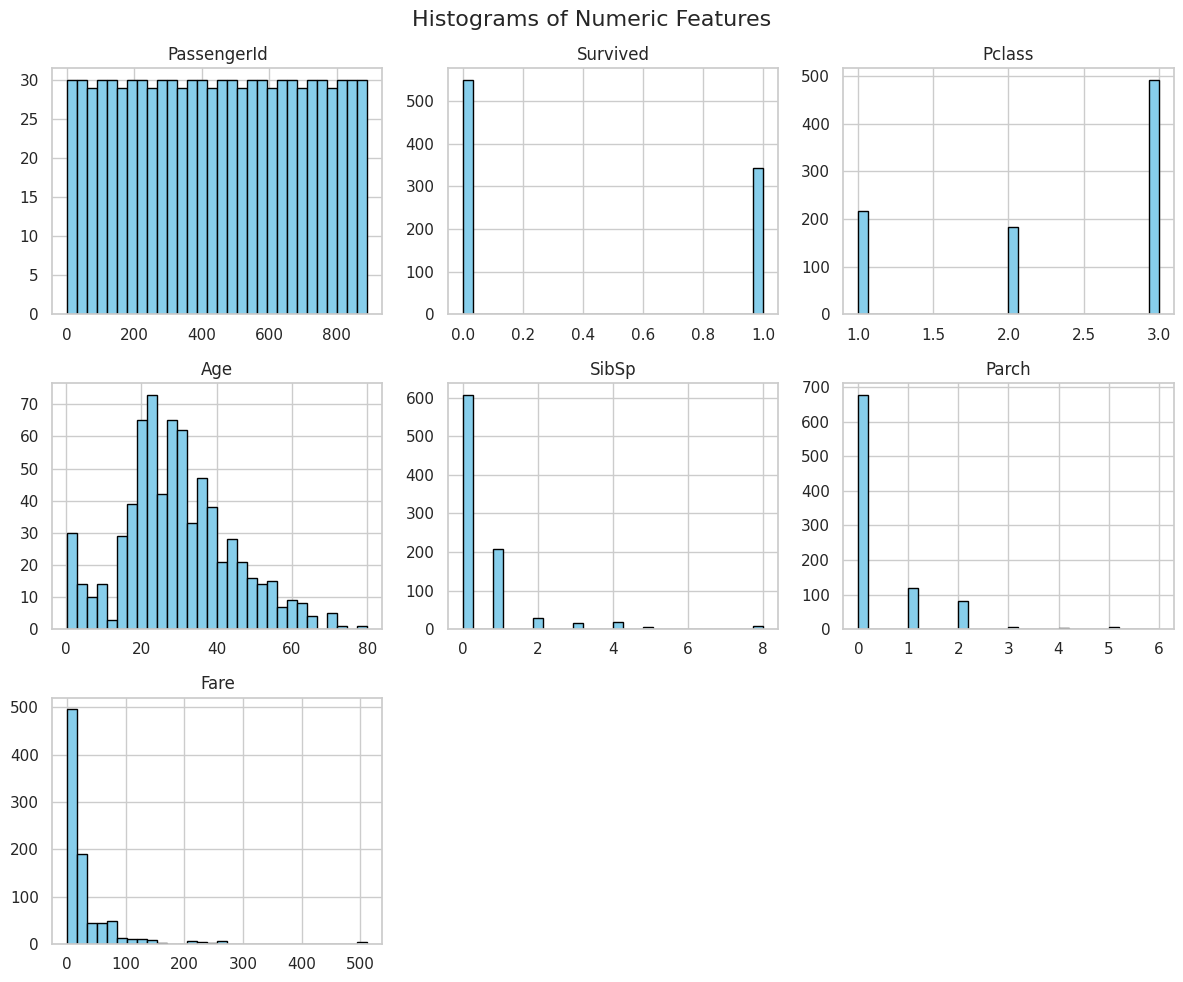

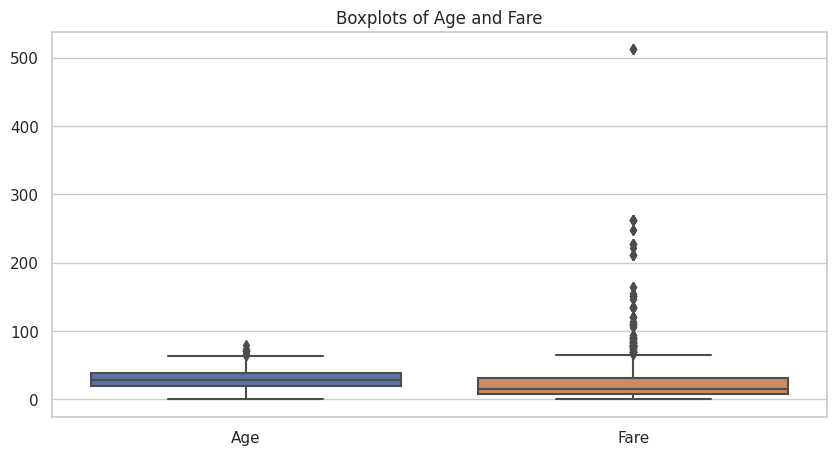

In [3]:
#2.Histograms and boxplots

# Histogram for all numeric columns
df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot for Age and Fare
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplots of Age and Fare')
plt.show()


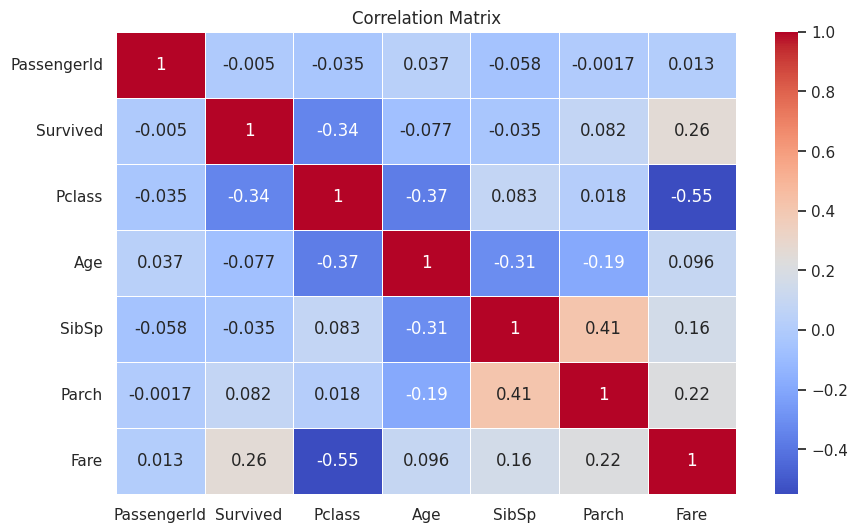

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

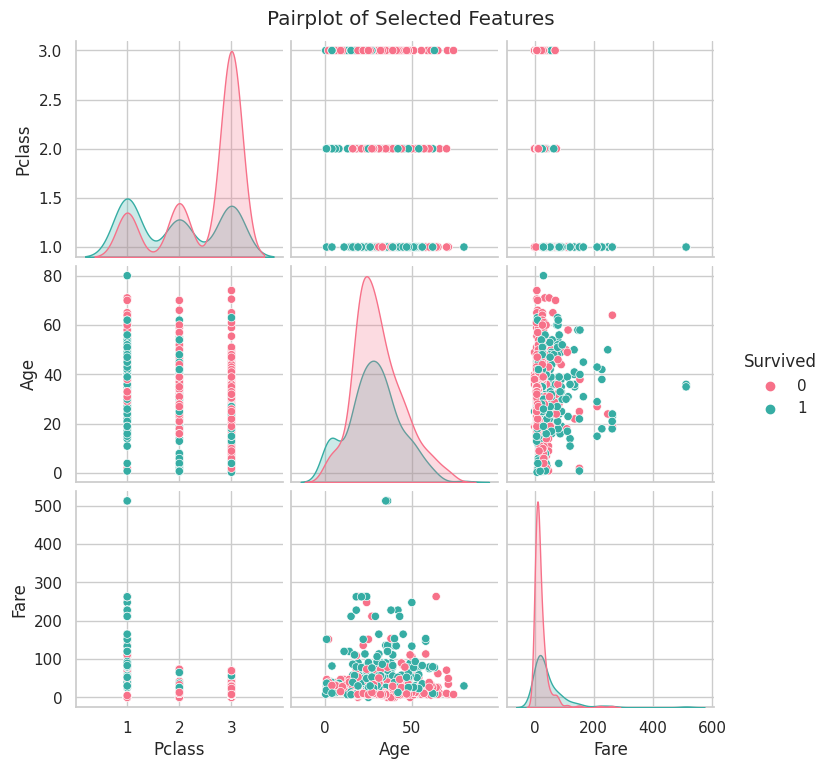

In [4]:
#3.Use pairplot/correlation matrix for feature relationships.

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot of selected features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


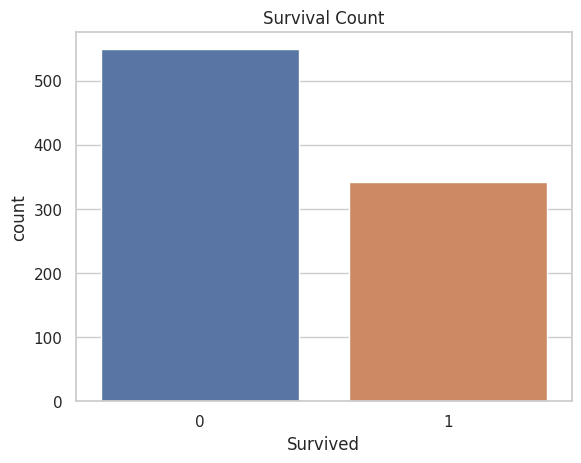

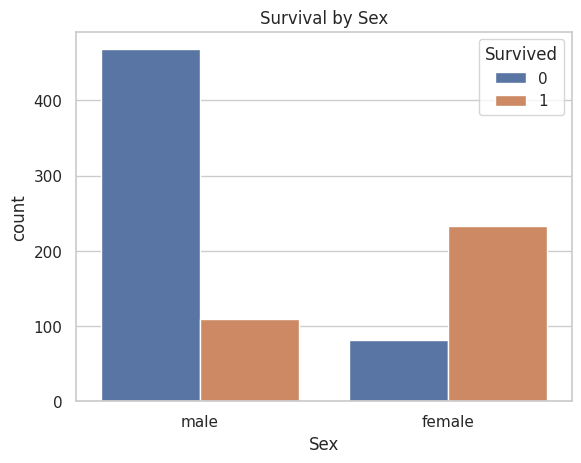

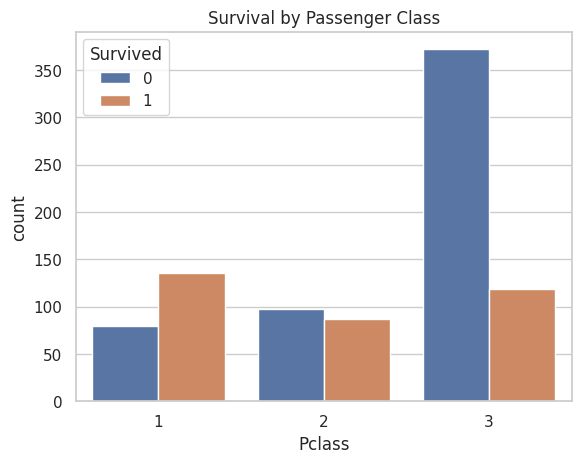

In [5]:
# Survival count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

# Survival by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


In [7]:
# Plotly histogram (Age vs Survival)
fig = px.histogram(df, x="Age", color="Survived", marginal="box", nbins=30,
                   title="Age Distribution by Survival",
                   labels={"Survived": "Survived (0 = No, 1 = Yes)"})
fig.show()


In [8]:
print("\n--- Key Observations ---")
print("- Age and Fare have visible outliers.")
print("- Missing values are in Age, Cabin, Embarked.")
print("- Females had higher survival rates than males.")
print("- 1st class passengers had better chances of survival.")



--- Key Observations ---
- Age and Fare have visible outliers.
- Missing values are in Age, Cabin, Embarked.
- Females had higher survival rates than males.
- 1st class passengers had better chances of survival.
